https://pypi.org/project/face-recognition/

https://practicaldatascience.co.uk/machine-learning/how-to-perform-facial-recognition-in-python



# Download libraries

In [ ]:
pip install face-recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 22 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=dbc6ca24279ad9f63453d9ee5d57023bd03d1e83c561d36217616171e13ef676
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [ ]:
pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image
import face_recognition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Files

In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/MPMD3.4 AI Balloons Happy Face/woman"

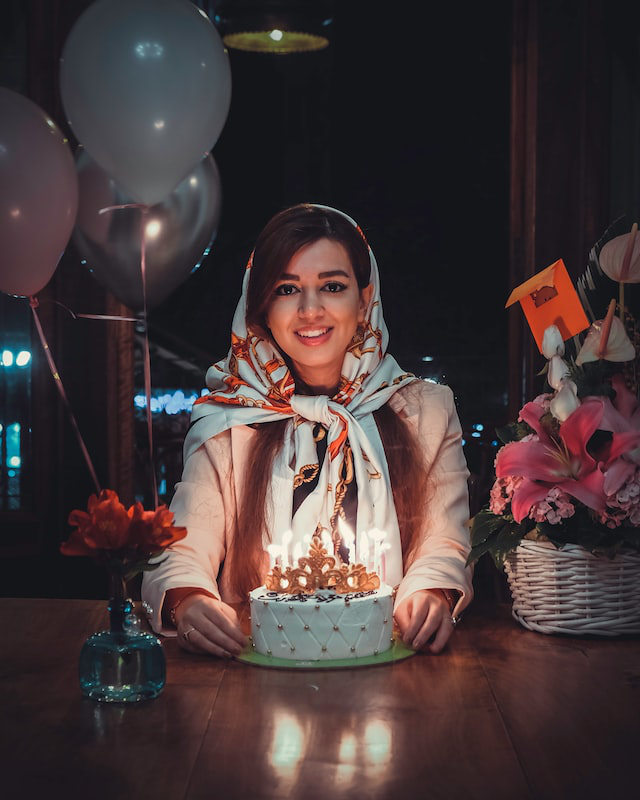

In [ ]:
image = Image.open(f'{file_path}.jpg')
display(image)

# Recognize faces

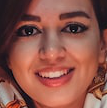

In [ ]:
image_array = face_recognition.load_image_file(f'{file_path}.jpg')
face_locations = face_recognition.face_locations(image_array)

for face_location in face_locations:
    top, right, bottom, left = face_location

    coordinates = image_array[top:bottom, left:right]
    face = Image.fromarray(coordinates)
    display(face)

In [ ]:
# using for loop incase there're more faces
face.save(f'{file_path}_face.jpg')

# Convert into greyscale & reshape array

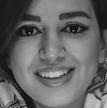

In [ ]:
face_array = face_recognition.load_image_file(f'{file_path}_face.jpg')
img = Image.open(f'{file_path}_face.jpg').convert('L')
img.save(f'{file_path}_face_greyscale.jpg')
img = Image.open(f'{file_path}_face_greyscale.jpg')
display(img)

resize: https://stackoverflow.com/questions/48121916/numpy-resize-rescale-image

In [ ]:
import cv2
#import numpy as np

img = cv2.imread(f'{file_path}_face_greyscale.jpg')
res = cv2.resize(img, dsize=(48, 48), interpolation=cv2.INTER_CUBIC)
img.shape, res.shape

((108, 107, 3), (48, 48, 3))

In [ ]:
import numpy as np

face_greyscale_array_new = np.delete(res, (1,2), 2)
face_greyscale_array_new.shape

(48, 48, 1)

In [ ]:
# normalize the data
face_greyscale_array_normalized = face_greyscale_array_new / 255.
face_greyscale_array_normalized.shape

(48, 48, 1)

In [ ]:
face_greyscale_array_normalized_shape = face_greyscale_array_normalized.reshape(1,48,48,1)
face_greyscale_array_normalized_shape.shape

(1, 48, 48, 1)

In [ ]:
# Save the faces into dataset

The dataset fromat should be:

index / pixels

0 / xxxxxxx

1 / xxxxxxx

2 / xxxxxxx

3 / xxxxxxx


# Read Model and get prediction

In [ ]:
from tensorflow.keras.models import model_from_json

# load json and create model
json_file = open('/content/drive/MyDrive/Colab Notebooks/MPMD3.4 AI Balloons Happy Face/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/MPMD3.4 AI Balloons Happy Face/model_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
mapper = {
    0: "Not Happy",
    1: "Happy"
}

In [ ]:
sample_img = face_greyscale_array_normalized_shape

https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes

In [ ]:
prediction = mapper[np.argmax(loaded_model.predict(sample_img), axis=-1)[0]]
prediction

1/1 [==============================] - 0s 15ms/step


'Happy'

# Visualize prediction

Happy Face detected


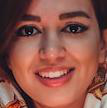

In [ ]:
if prediction=='Happy':
  print(f'Happy Face detected')
else:
  print(f"Didn't identify happy faces")

image = Image.open(f'{file_path}_face.jpg')
display(image)

Further resources:

https://realpython.com/face-recognition-with-python/